## What is a classification problem?
* A classification problem involves predicting whether something is one thing or another.
* Types of classification problems :
    1. **Binary classification**	Target can be one of two options, e.g. yes or no

    2. **Multi-class classification** -	Target can be one of more than two classes.

    3. **Multi-label classification** - Target can be assigned more than one option.

### Architecture of a classification neural network
* For Binary classification:
    - Hidden layers : ReLU or other variants of ReLU
    - Output layer : Sigmoid functions
* For Multi-class classification:
    - Hidden layers : ReLU or other variants of ReLU
    - Output layer : Softmax functions

### Prepare Classification data

In [1]:
from sklearn.datasets import make_circles

x, y  = make_circles(n_samples=2000, shuffle=True, noise=0.03, random_state=42)

print(len(x), len(y))

2000 2000


In [2]:
print("Features : \n", x[:5])
print("Labels : ",y[:5])

Features : 
 [[ 0.47109875 -0.58158579]
 [-0.61696058  0.80818956]
 [-0.3999557   0.70796779]
 [ 0.82938523 -0.60057314]
 [-0.16419138  0.76128858]]
Labels :  [1 0 1 0 1]


In [3]:
import pandas as pd
dataframe = {"X1":x[:,0], "X2":x[:, 1], "Y":y}
data = pd.DataFrame(dataframe)
data.head(10)

,X1,X2,Y
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
5,-0.161906,0.778817,1
6,0.970100,-0.354272,0
7,-0.105737,-0.804784,1
8,0.908106,0.459450,0
9,-0.342749,0.730214,1


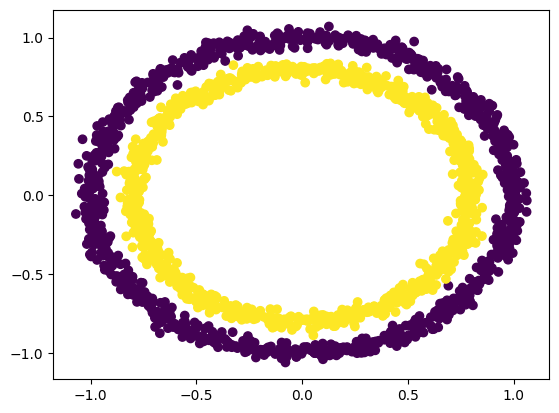

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=data["X1"], y=data["X2"], c=data["Y"])

In [5]:
# Check the input and output shapes
print("Input shape : ",x.shape)
print("Labels shape : ", y.shape)

Input shape :  (2000, 2)
Labels shape :  (2000,)


In [6]:
# Turn the data into tensors
import torch
torch.__version__

'2.5.1+cu121'

In [7]:
X = torch.from_numpy(x).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

print(X[:5])
print(Y[:5])

tensor([[ 0.4711, -0.5816],
        [-0.6170,  0.8082],
        [-0.4000,  0.7080],
        [ 0.8294, -0.6006],
        [-0.1642,  0.7613]])
tensor([1., 0., 1., 0., 1.])


In [8]:
print(type(X), X.dtype, Y.dtype)

<class 'torch.Tensor'> torch.float32 torch.float32


In [9]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of training features : ", X_train.shape)
print("Shape of training labels : ", Y_train.shape)
print("Shape of testing features : ", X_test.shape)
print("Shape of testing labels : ", Y_test.shape)

Shape of training features :  torch.Size([1600, 2])
Shape of training labels :  torch.Size([1600])
Shape of testing features :  torch.Size([400, 2])
Shape of testing labels :  torch.Size([400])


###  Building a model
* We've got some data ready, now it's time to build a model.

* We'll break it down into a few parts.

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing nn.Module.
3. Defining a loss function and optimizer.
4. Creating a training loop

In [10]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [11]:
# Model building - a classification model with 1 hidden layer and 1 output layer
# This model doen't have non-linearity

class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)  # out_features of previous layer should match in_features on next layer

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = ClassificationModel().to(device)
print(model_0)

ClassificationModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [12]:
# Lets create the same model structure type using the sequential API (same as tensorflow)
# This is simplest, but since we have complex model that uses Functional layers (parallel layers) that's why we dont use it much

model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=1),
)
model.to(device)
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [13]:
# Untrained model parameters
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1333,  0.3018],
                      [ 0.1086,  0.0967],
                      [-0.5337, -0.3624],
                      [ 0.3844,  0.0302],
                      [ 0.2988, -0.6430],
                      [-0.4079,  0.2319],
                      [-0.6264, -0.5086],
                      [-0.4528, -0.2918],
                      [-0.0985,  0.1538],
                      [ 0.6206,  0.4581]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.1431,  0.0551,  0.3143,  0.1787, -0.1590, -0.6663,  0.3281,  0.3959,
                       0.0385,  0.3855], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0972, -0.0134, -0.1299,  0.2540,  0.0013,  0.1253,  0.2976, -0.1149,
                       -0.0322, -0.2511]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.3044], device='cuda:0'))])

PyTorch has two binary cross entropy implementations:

1. torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).

2. torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).

In [30]:
# Setup loss function and optimizer
# nn.BCEWithLogitsLoss is actually just cross entropy loss that comes inside a sigmoid function.
# It may be used in case your model's output layer is not wrapped with sigmoid. Typically used with the raw output of a single output layer neuron.

loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

In [31]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [32]:
# Create a sigmoid function
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

### Training the model

In [46]:
# Remember than this model is linear model (has no non-linearity)
# Note : Convert the logits (z=wx+b) to probabilities using sigmoid (y_hat=f(z))
# and then convert the probabilities to prediction labels using a threshold rule such as:
# if y_prob > 0.5: y_pred = 1 else y_pred = 0

torch.manual_seed(42)

epochs = 100
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

for i in range(epochs):
    model_0.train()
    y_logits = model(X_train).squeeze()
    y_probs = sigmoid(y_logits)  # or use torch.sigmoid()
    y_pred = torch.round(y_probs)

    train_loss = loss_function(y_logits, Y_train)   # becuase we are using BCEWithLogitsLoss
    # train_loss = loss_function(y_probs, Y_train)    # could have been used with BCELoss

    train_accuracy = accuracy_fn(Y_train, y_pred)


    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_probs = sigmoid(test_logits)  # or use torch.sigmoid()
        test_preds = torch.round(test_probs)

        test_loss = loss_function(test_logits, Y_test)
        # test_loss = loss_function(test_probs, Y_test)

        test_accuracy = accuracy_fn(Y_test, test_preds)

        if i % 10 == 0:
            print(f"Epoch {i} | Train Loss = {train_loss} and Train acc. = {train_accuracy} | Test Loss = {test_loss} and Test acc. = {test_accuracy}")


Epoch 0 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 10 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 20 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 30 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 40 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 50 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 60 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss = 0.7050172090530396 and Test acc. = 60.75000000000001
Epoch 70 | Train Loss = 0.7075976133346558 and Train acc. = 58.5 | Test Loss 

In [58]:
import numpy as np
def plot_decision_boundary(model, X, y, resolution=0.01, device='cpu'):
    """
    Plots the decision boundary of a PyTorch classification model.

    Args:
        model: PyTorch model to evaluate.
        X (torch.Tensor): Input data (features), should be 2D with shape (n_samples, 2).
        y (torch.Tensor): True labels (n_samples,).
        resolution (float): Grid resolution for plotting.
        device (str): Device ('cpu' or 'cuda') where the model is located.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Move data and model to the specified device
    X = X.to(device)
    y = y.to(device)
    model.to(device)

    # Define the grid for plotting
    x_min, x_max = X[:, 0].min().item() - 0.5, X[:, 0].max().item() + 0.5
    y_min, y_max = X[:, 1].min().item() - 0.5, X[:, 1].max().item() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Prepare grid points as input to the model
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)

    # Predict probabilities for the grid points
    with torch.no_grad():
        predictions = model(grid)
        if predictions.shape[1] > 1:  # Multi-class classification
            Z = torch.argmax(predictions, axis=1).cpu().numpy()
        else:  # Binary classification (single output)
            Z = (torch.sigmoid(predictions).cpu().numpy() > 0.5).astype(int).ravel()

    # Reshape predictions back to the grid shape
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

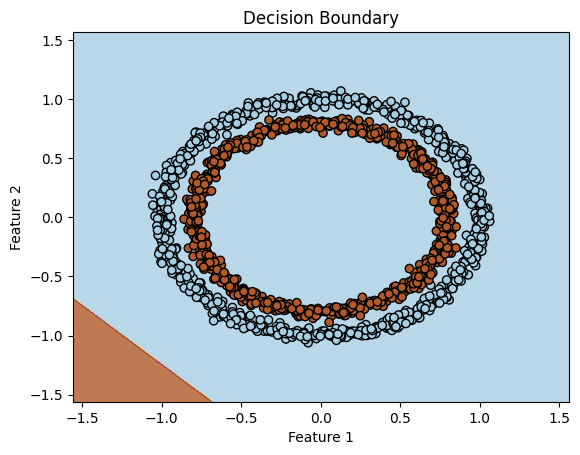

In [95]:
plot_decision_boundary(model_0, X_train, Y_train, device=device)

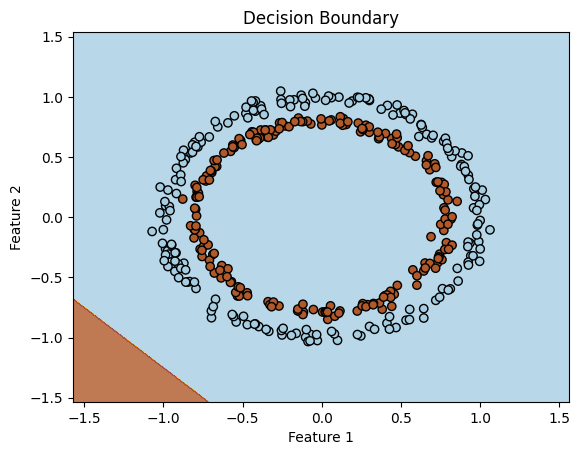

In [96]:
plot_decision_boundary(model_0, X_test, Y_test, device=device)

In [61]:
# So the model is predicting all zeros
y_preds = torch.round(sigmoid(model_0(X_test)))
y_preds[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)

### Lack of Non-linearity
* So far our neural networks have only been using linear (straight) line functions.

* But the data we've been working with is non-linear (circles).

* One of the most common and best performing is ReLU (rectified linear-unit, torch.nn.ReLU()).

In [99]:
# Build model with non-linear activation function

class ClassificationModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=5),
            nn.ReLU(),
            nn.Linear(in_features=5, out_features=1)
        )
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.layers_stack(x)

In [100]:
model = ClassificationModelV2().to(device)
model

ClassificationModelV2(
  (layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [101]:
from torchsummary import summary
summary(model, input_size=X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 1600, 10]              30
              ReLU-2             [-1, 1600, 10]               0
            Linear-3              [-1, 1600, 5]              55
              ReLU-4              [-1, 1600, 5]               0
            Linear-5              [-1, 1600, 1]               6
Total params: 91
Trainable params: 91
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.38
Params size (MB): 0.00
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


In [102]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [103]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), Y_train.to(device)
X_test, y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69353, Accuracy: 49.88% | Test Loss: 0.69249, Test Accuracy: 48.25%
Epoch: 100 | Loss: 0.20801, Accuracy: 99.62% | Test Loss: 0.20915, Test Accuracy: 99.25%
Epoch: 200 | Loss: 0.02375, Accuracy: 99.75% | Test Loss: 0.02461, Test Accuracy: 99.75%
Epoch: 300 | Loss: 0.01117, Accuracy: 99.94% | Test Loss: 0.01502, Test Accuracy: 99.75%
Epoch: 400 | Loss: 0.00683, Accuracy: 100.00% | Test Loss: 0.00671, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00481, Accuracy: 100.00% | Test Loss: 0.00394, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00372, Accuracy: 100.00% | Test Loss: 0.00291, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00299, Accuracy: 100.00% | Test Loss: 0.00237, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00250, Accuracy: 100.00% | Test Loss: 0.00193, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00215, Accuracy: 100.00% | Test Loss: 0.00159, Test Accuracy: 100.00%


In [104]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()
y_preds[:10], Y_test[:10] # want preds in same format as truth labels

(tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1.], device='cuda:0'),
 tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1.], device='cuda:0'))

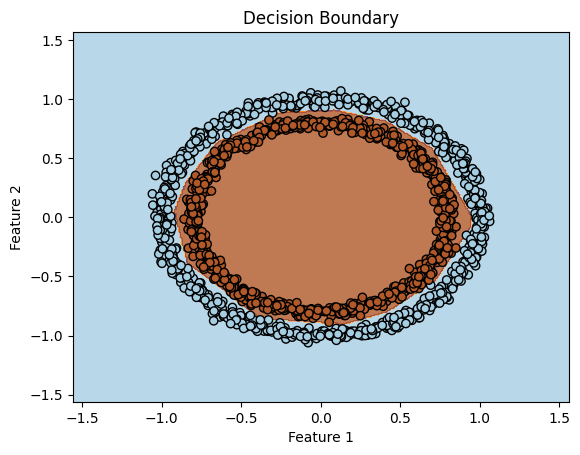

In [92]:
plot_decision_boundary(model, X_train, Y_train)

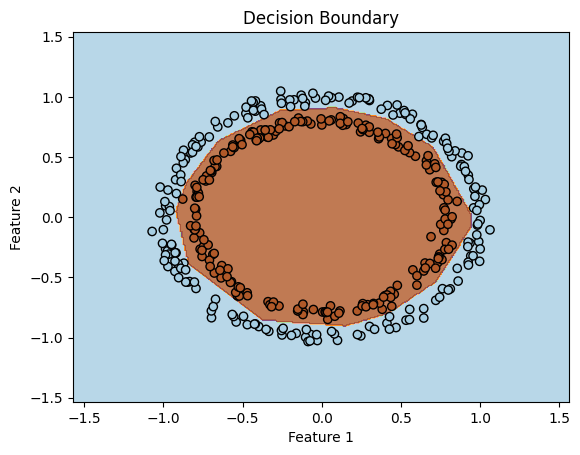

In [93]:
plot_decision_boundary(model, X_test, Y_test)

### Final Conclusion
* Neural Networks are very powerful in case of both linear and non-linear datasets
* The non-linear activation functions add non-linearity to it inorder to learn complex patterns in data
* It's practically impossible to achieve 100% accuracy so don't get upset. Its just a toy dataset